In [1]:
# Description: This program uses a Long Short-Term Memory (LSTM) neural network
# to predict the closing price of a stock (AAPL, as Swiggy data may be limited) 
# using the past 60 days' stock price.

In [2]:
# Import the libraries
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Download stock data (using AAPL)
symbol = 'AAPL'
data = yf.download(symbol, start='2012-01-01', end='2025-01-01')
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2012-01-03  12.359183  12.397353  12.292163  12.304185  302220800
2012-01-04  12.425604  12.462872  12.300579  12.322217  260022000
2012-01-05  12.563554  12.579182  12.402463  12.470987  271269600
2012-01-06  12.694887  12.705406  12.599315  12.615845  318292800
2012-01-09  12.674752  12.855679  12.663331  12.788057  394024400


In [4]:
# Check data shape
print(f"Data shape: {data.shape}")

Data shape: (3270, 5)


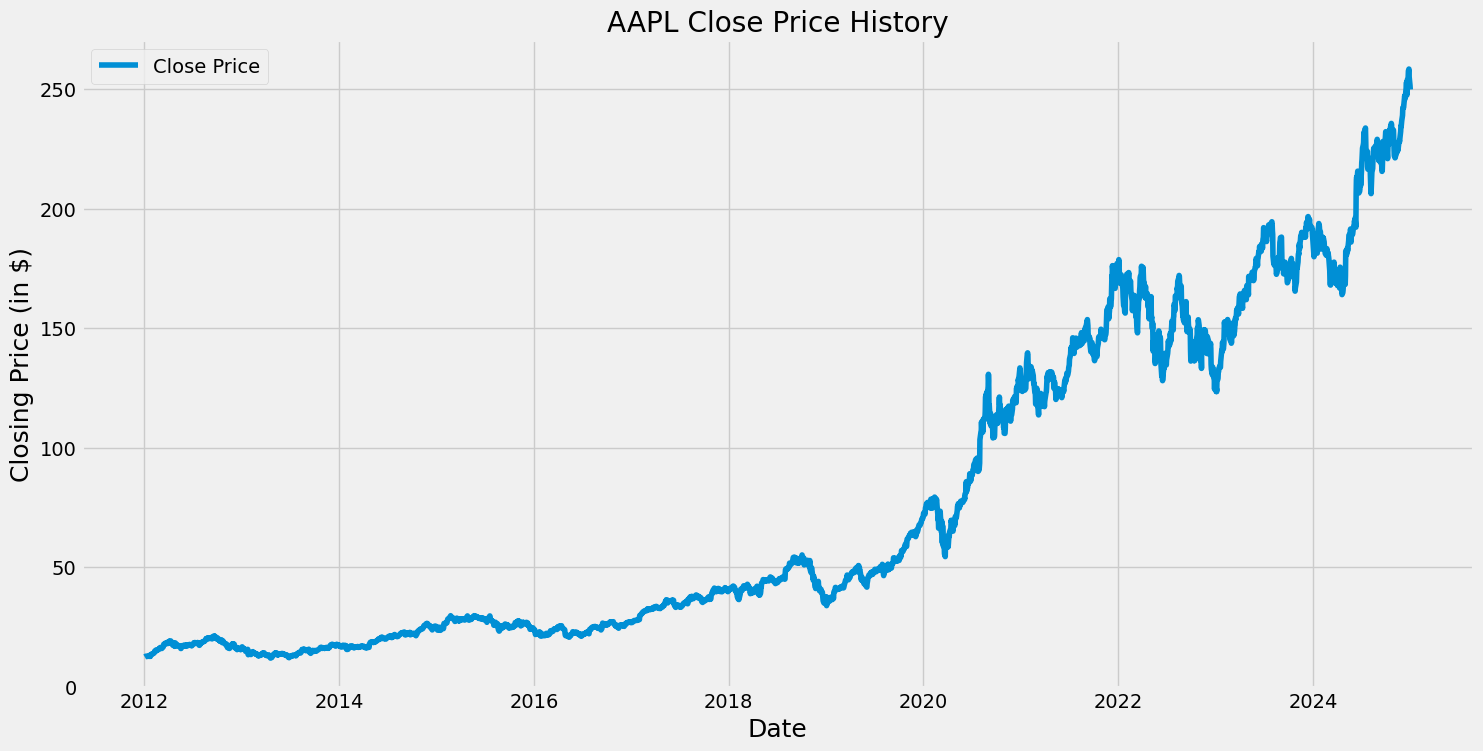

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title(f'{symbol} Close Price History')
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price (in $)', fontsize=18)
plt.legend()
plt.show()

In [6]:
# Create a new DataFrame with only the 'Close' column
dataset = data[['Close']].values  # Convert to NumPy array directly

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [8]:
# Define training data length (80% of data)
training_data_len = math.ceil(len(dataset) * 0.8)
print(f"Training data length: {training_data_len}")

Training data length: 2616


In [9]:
# Create the training dataset
train_data = scaled_data[0:training_data_len, :]

In [11]:
# Split into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # 60 days of closing prices
    y_train.append(train_data[i, 0])       # Next day's closing price
    if i <= 61:  # Print first two iterations for verification
        print("x_train:", x_train)
        print("y_train:", y_train)
        print()

x_train: [array([0.00182112, 0.00209059, 0.00265025, 0.00318307, 0.00310139,
       0.00328551, 0.00320136, 0.00305993, 0.00286727, 0.00346352,
       0.00400125, 0.00383541, 0.00292702, 0.00379393, 0.00294044,
       0.00614111, 0.0058936 , 0.00621671, 0.00691536, 0.00733847,
       0.0073031 , 0.00717265, 0.00772866, 0.00825172, 0.0088443 ,
       0.00980146, 0.01181208, 0.01184257, 0.01296189, 0.01379837,
       0.01236078, 0.01291434, 0.01290336, 0.01445554, 0.01423484,
       0.01464331, 0.01537736, 0.01578582, 0.01696244, 0.01781961,
       0.01806714, 0.0181537 , 0.01668811, 0.01633449, 0.01638694,
       0.01776472, 0.01815247, 0.01898527, 0.02094836, 0.02356743,
       0.02307724, 0.02307849, 0.02497204, 0.02556464, 0.02514275,
       0.02475745, 0.02435629, 0.02568898, 0.02660348, 0.02698632])]
y_train: [np.float64(0.026040161636658496)]

x_train: [array([0.00182112, 0.00209059, 0.00265025, 0.00318307, 0.00310139,
       0.00328551, 0.00320136, 0.00305993, 0.00286727, 0.00346

In [12]:
# Convert to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
# Reshape x_train for LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(f"x_train shape: {x_train.shape}")

x_train shape: (2556, 60, 1)


In [14]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/Users/shoryavardhan/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model (increased epochs for better training)
model.fit(x_train, y_train, batch_size=1, epochs=5, verbose=1)  # Adjust epochs as needed

Epoch 1/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0021
Epoch 2/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 2.8091e-04
Epoch 3/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 2.0539e-04
Epoch 4/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 1.5337e-04
Epoch 5/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 1.5044e-04


In [17]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]  # Include 60 days before test period
x_test = []
y_test = dataset[training_data_len:, :]  # Actual closing prices for test period

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [18]:
# Convert x_test to NumPy array and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(f"x_test shape: {x_test.shape}")

x_test shape: (654, 60, 1)


In [19]:
# Get model predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Unscale predictions

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [20]:
# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 4.331637121178238


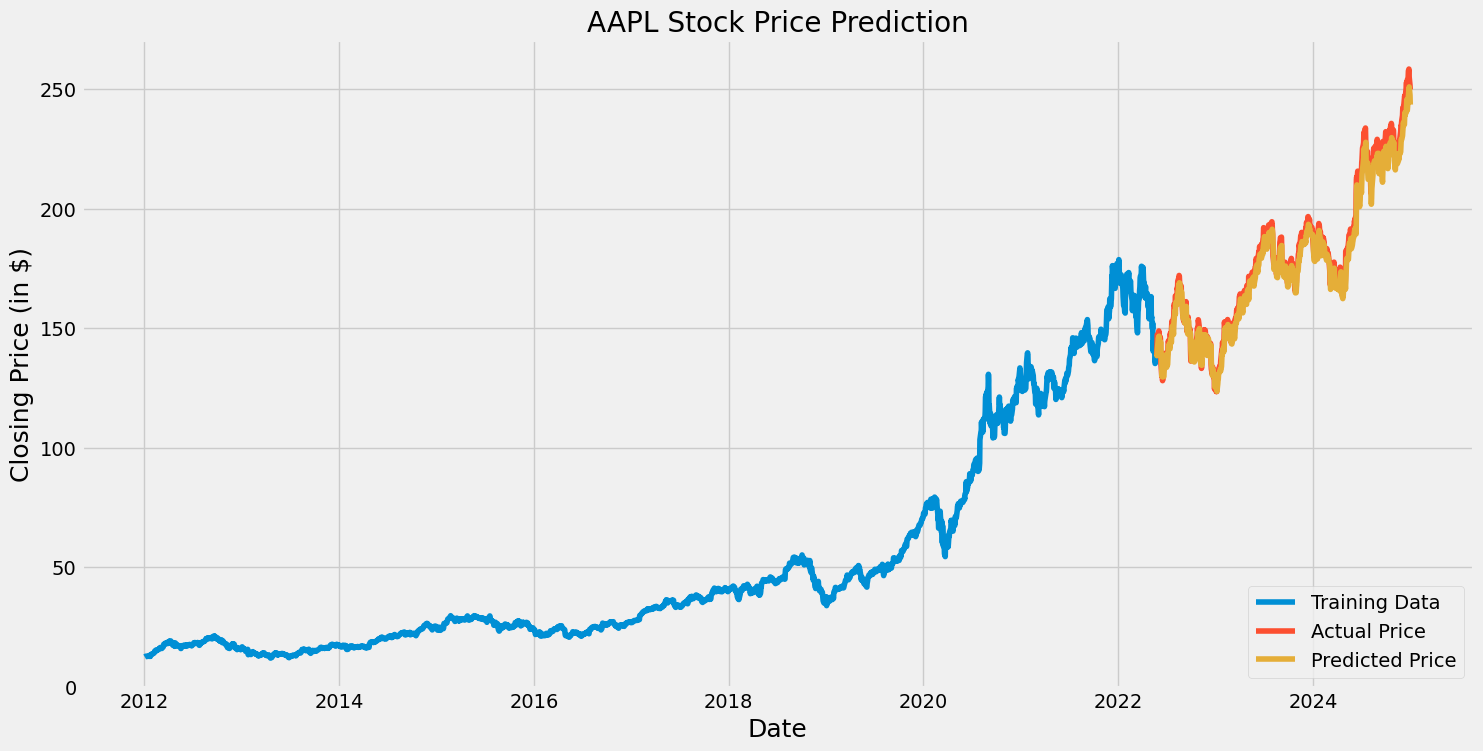

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price (in $)', fontsize=18)
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.legend(loc='lower right')
plt.show()

In [26]:
print(f"Last Actual Price: {float(valid['Close'].iloc[-1]):.2f}")
print(f"Last Predicted Price: {float(valid['Predictions'].iloc[-1]):.2f}")

Last Actual Price: 249.82
Last Predicted Price: 243.51


/var/folders/9g/p2kk2f6j5j10xc6v5cf0jnmm0000gn/T/ipykernel_1572/1374246090.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"Last Actual Price: {float(valid['Close'].iloc[-1]):.2f}")
